

# Treatment Recommendation System based on NLP




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import spacy
import spacy.cli
# spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()
import re

## Part 1: Load dataset

In [ ]:
df = pd.read_csv('/content/patients_data.csv');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       3349 non-null   object
 1   Gender     3349 non-null   object
 2   Age        3349 non-null   int64 
 3   City       3349 non-null   object
 4   State      3170 non-null   object
 5   Condition  3349 non-null   object
 6   Symptom    3349 non-null   object
 7   Treatment  3328 non-null   object
dtypes: int64(1), object(7)
memory usage: 209.4+ KB


In [ ]:
df.head()

,Name,Gender,Age,City,State,Condition,Symptom,Treatment
0,punxcat,Female,26,Berkshire,United Kingdom,Acanthamoeba Keratitis,"Depressed mood,Pain,Insomnia","Chlorhexidine gluconate 0.02% solution,Ibuprofen"
1,yesLiGue77,Female,42,Los Angeles,CA,Acquired Brain Injury,"Fatigue,Anxious mood,Insomnia","Lorazepam,Orthotics"
2,bertusj,Male,40,Prince Albert,Western Cape,ADD (Attention Deficit Disorder),"Insomnia,Fatigue","Trazodone,Fluoxetine,Methylphenidate,Amphetami..."
3,munchkin888,Female,43,Evanston,IL,ADD (Attention Deficit Disorder),"Anxious mood,Pain","Methylphenidate,Amphetamine-Dextroamphetamine,..."
4,bassoongirl,Female,27,IL,United States,ADD (Attention Deficit Disorder),"Insomnia,Fatigue,Depressed mood","Atomoxetine,Methylphenidate,Trazodone,Fluoxeti..."


## Preprocessing

deal with missing value

Name           0
Gender         0
Age            0
City           0
State        179
Condition      0
Symptom        0
Treatment     21
dtype: int64
Percentage of missing value in ' Treatment ' is 0.6270528515974918 % 


Text(0, 0.5, 'Number of Missing Values')

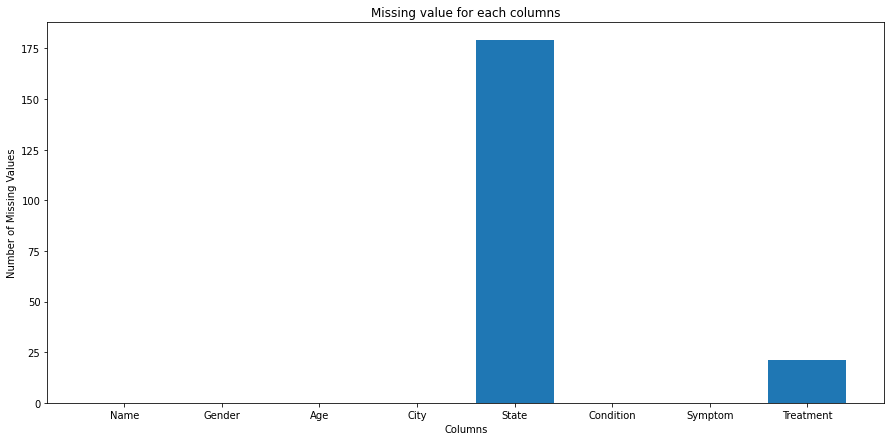

In [ ]:
print(df.isna().sum())
null_num = df.isna()['Treatment'].sum()
print (f"Percentage of missing value in \' Treatment \' is {null_num * 100 /df.shape[0]} % ")
plt.figure(figsize=(15,7))
plt.bar(df.columns, df.isna().sum())
plt.title('Missing value for each columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

In [ ]:
df.dropna(subset=['Treatment'], inplace=True)
print(df.isna().sum())
print( f"Final size of the dataset is: {df.shape[0]}")

Name           0
Gender         0
Age            0
City           0
State        177
Condition      0
Symptom        0
Treatment      0
dtype: int64
Final size of the dataset is: 3328


data cleaning

In [ ]:
# remove words not belong to the treatments
l = ['Fatigue', 'Anxious mood','Pain', 'Insomnia', 'Skin pain', 'Psoriatic plaques (scaly patches)', 'swelling)']
record = set()
for index, row in df.iterrows():
    new = re.split(',|"', row['Treatment'])
    for word in l:
        if word in new:
            record.add(index)
df.drop(list(record), inplace=True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df.sort_values('Condition', ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Name,Gender,Age,City,State,Condition,Symptom,Treatment
0,bertusj,Male,40,Prince Albert,Western Cape,ADD (Attention Deficit Disorder),"Insomnia,Fatigue","Trazodone,Fluoxetine,Methylphenidate,Amphetami..."
1,munchkin888,Female,43,Evanston,IL,ADD (Attention Deficit Disorder),"Anxious mood,Pain","Methylphenidate,Amphetamine-Dextroamphetamine,..."
2,bassoongirl,Female,27,IL,United States,ADD (Attention Deficit Disorder),"Insomnia,Fatigue,Depressed mood","Atomoxetine,Methylphenidate,Trazodone,Fluoxeti..."
3,LittleBean,Female,31,Vancouver,BC,ADD (Attention Deficit Disorder),"Anxious mood,Depressed mood","Fluoxetine,Methylphenidate"
4,krissiee21,Female,37,IN,United States,ADD (Attention Deficit Disorder),Anxious mood,"Trazodone,Atomoxetine"
...,...,...,...,...,...,...,...,...
3281,Chelena,Female,60,Sacramento,CA,Undifferentiated Inflammatory Arthritis,"Pain,Fatigue,Anxious mood","Prednisone,Tramadol,Clonazepam,Duloxetine,Napr..."
3282,lupuschick45,Female,49,Boston,MA,Undifferentiated Inflammatory Arthritis,"Pain,Fatigue,Depressed mood","Tramadol,Naproxen Prescription"
3283,susiecanuck,Female,69,ON,Canada,Undifferentiated Inflammatory Arthritis,Insomnia,"Amitriptyline,Prednisone,Meloxicam,Diclofenac"
3284,strawberryebay1,Female,41,Holiday Island,AR,Vasovagal Syncope,"Insomnia,Pain,Sweating","Gabapentin,Diclofenac,Trazodone,Clonazepam,Hyd..."


## Exploratory Data Analysis

In [ ]:
class EDA:
    def __init__(self):
        pass

class Mapping(EDA):
    def __init__(self):
        pass
    
    # create mapping
    def one_to_n_mapping(self, df, mapping_from, mapping_to):
        feature_name = df[mapping_from].unique()
        mapping = dict()
        visited = set()
        for feature in feature_name:
            if feature not in visited:
                visited.add(feature)
                mapping[feature] = set()
        for feature in feature_name:
            new = df.loc[df[mapping_from] == feature]
            for index, row in new.iterrows():
                results = row[mapping_to].split(',')
                for result in results:
                    mapping[feature].add(result)
        return mapping
    
    def n_to_one_mapping(self, df, mapping_from, mapping_to):
        visited = set()
        mapping = dict()
        for index, row in df.iterrows():
            new = re.split(',|"', row[mapping_from])
            for feature in new:
                    if feature not in visited and feature:
                        visited.add(feature)
                        mapping[feature] = set()

        m = self.one_to_n_mapping(df, mapping_to, mapping_from)
        for index, row in df.iterrows():
            new = re.split(',|"', row[mapping_from])
            for feature in new:
                for m_key, m_value in m.items():
                    if feature not in m_value:
                        continue
                    mapping[feature].add(m_key)
        return mapping

class Visualization(EDA):
    # word cloud visualization
    def word_cloud(self, df, mapping_from, mapping=None):
        if mapping:
            res = ''
            for feature in df[mapping_from].unique():
                a = mapping[feature]
                k = ' '.join(a)
                res += k
        else:
            df_feature = df[mapping_from]
            res = ' '.join(df_feature)

        wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(res)
        plt.figure(figsize=(15, 10))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off');

    def top_n_visualization(self, dictionary, first_n=10, xlabel=None, ylabel=None):
        sns_2 = sns.barplot(x=list(dictionary.keys())[:first_n], y=list(dictionary.values())[:first_n])
        sns_2.set_title("Most {} frequent {}".format(first_n, xlabel))
        sns_2.set_xlabel(xlabel)
        sns_2.set_ylabel("Number of {}".format(ylabel))
        plt.xticks(rotation=45);

In [ ]:
map = Mapping()

# each condition will have n treatments
mapping_condition_treatment = map.one_to_n_mapping(df, mapping_from='Condition', mapping_to='Treatment')

# each condition will have n symptoms
mapping_condition_symptom = map.one_to_n_mapping(df, mapping_from='Condition', mapping_to='Symptom')

# each symptom occurs in n conditions
mapping_symptom_condition = map.n_to_one_mapping(df, mapping_from='Symptom', mapping_to='Condition')

# each treatment occurs in n conditions
mapping_treatment_condition =  map.n_to_one_mapping(df, mapping_from='Treatment', mapping_to='Condition')

In [ ]:
len(mapping_condition_treatment['ADD (Attention Deficit Disorder)'])

10

In [ ]:
print("number of unique conditions:", len(df['Condition'].unique()))
print('\n')
condition_dict = df['Condition'].value_counts()
condition_dict

number of unique conditions: 240




Multiple Sclerosis                     963
Fibromyalgia                           504
ALS (Amyotrophic Lateral Sclerosis)    250
Epilepsy                               184
HIV (Human Immunodeficiency Virus)      98
                                      ... 
Neurogenic Bowel Disorder                1
Neurofibromatosis                        1
Eosinophilic Esophagitis                 1
Nail Fungus                              1
West Nile Virus                          1
Name: Condition, Length: 240, dtype: int64

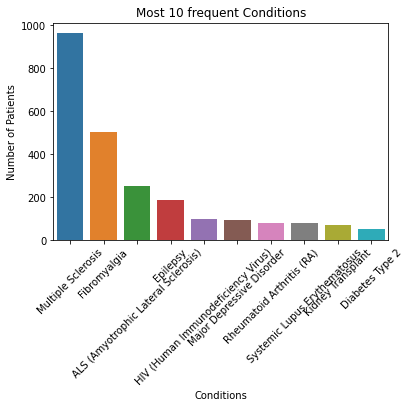

In [ ]:
# Most n frequent Conditions
vs = Visualization()
condition_dict = dict(condition_dict)
vs.top_n_visualization(condition_dict, first_n=10, xlabel="Conditions", ylabel="Patients")

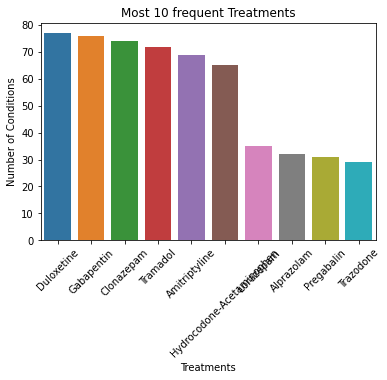

In [ ]:
# Most n frequent Treatments
# most_10_high_frequent_treatment = dict(sorted(mapping_treatment_condition.items(), key=lambda x: len(x[1]), reverse=True))
treatment_length_dict = {key: len(value) for key, value in mapping_treatment_condition.items()}
treatment_length_dict = dict(sorted(treatment_length_dict.items(), key=lambda x: x[1], reverse=True))

vs.top_n_visualization(treatment_length_dict, first_n=10, xlabel="Treatments", ylabel="Conditions")

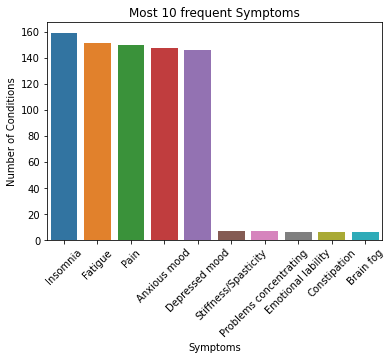

In [ ]:
# Most n frequent Symptoms
symptom_length_dict = {key: len(value) for key, value in mapping_symptom_condition.items()}
symptom_length_dict = dict(sorted(symptom_length_dict.items(), key=lambda x: x[1], reverse=True))

vs.top_n_visualization(symptom_length_dict, first_n=10, xlabel="Symptoms", ylabel="Conditions")

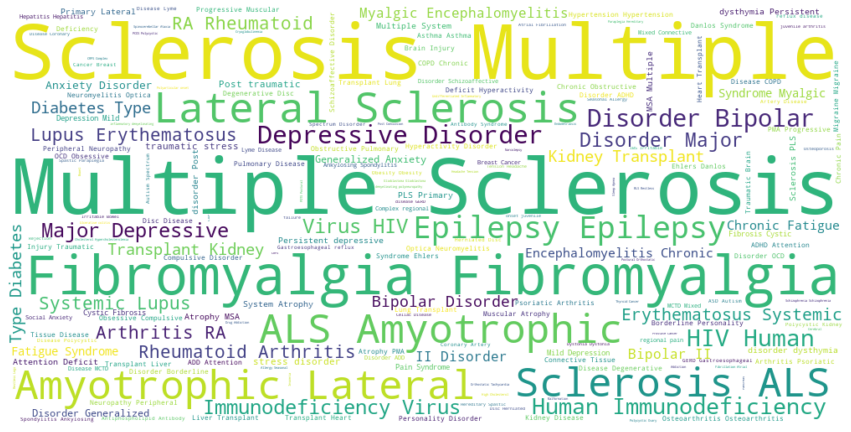

In [ ]:
# Word cloud of condition frequency 
vs.word_cloud(df, mapping_from='Condition')

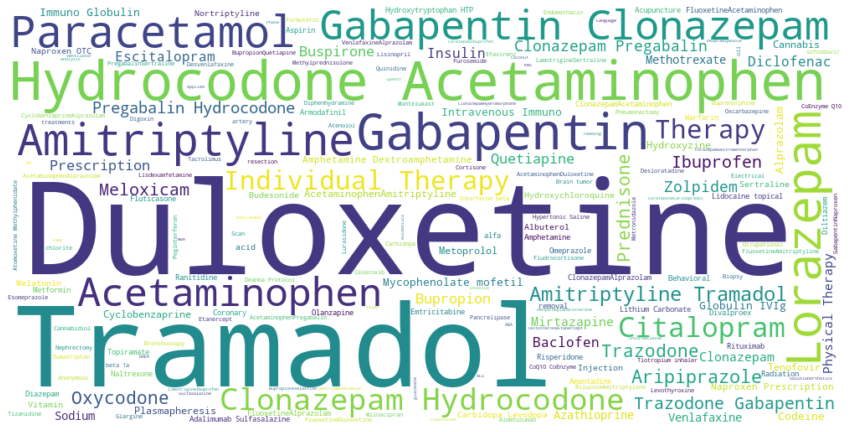

In [ ]:
# Word cloud of treatment for different conditions
vs.word_cloud(df, 'Condition', mapping_condition_treatment)

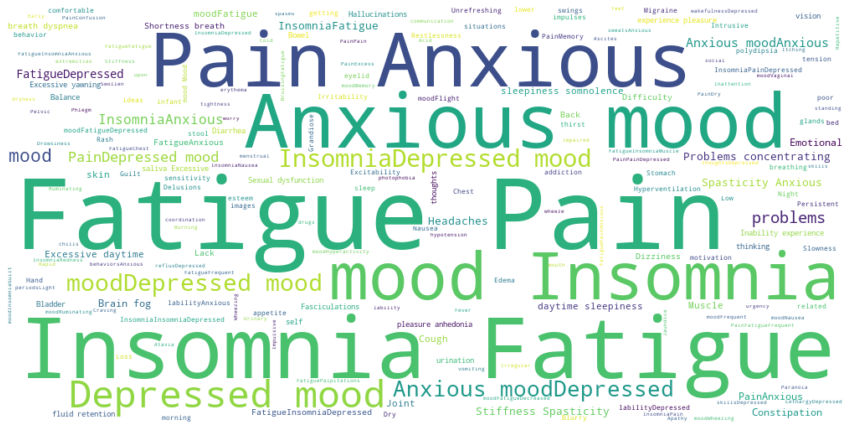

In [ ]:
# Word cloud of symptoms for different conditions
vs.word_cloud(df, 'Condition', mapping_condition_symptom)

## Recommendation System

Train Test split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.25)

In [ ]:
# len(treatment_length_dict) 372
# len(condition_dict) 240
# len(symptom_length_dict) 147

In [ ]:
doc1 = nlp(u'the person wear red T-shirt')
doc2 = nlp(u'this person is walking')
doc3 = nlp(u'the boy wear red T-shirt')
tokens = [doc1, doc2, doc3]
          
for token in tokens:
    # Printing the following attributes of each token.
    # text: the word string, has_vector: if it contains
    # a vector representation in the model, 
    # vector_norm: the algebraic norm of the vector,
    # is_oov: if the word is out of vocabulary.
    print(token.text, token.has_vector, token.vector_norm)
  
token1, token2, token3 = tokens[0], tokens[1], tokens[2]
  
print("Similarity:", token1.similarity(token2))
print("Similarity:", token2.similarity(token3))
print("Similarity:", token1.similarity(token3))


# find similar word 词汇联想
# https://www.holisticseo.digital/python-seo/nltk/wordnet#What-are-the-related-terms-to-the-WordNet-from-NLTK



def find_similar_symptoms():
    pass

    
def find_similar_patients(user_symptom,user_disease,age,gender):

	# 找相似的symptom，和input的symptom合并
	similar_symptom = find_similar_symptoms(user_symptom)
	for i,item in enumerate(similar_symptom):
		similar_symptom[i]=item.lower()
	user_symp_len=len(user_symptom)
	user_symptom=user_symptom+similar_symptom
	symptom_list=list(set(user_symptom))
	for i,item in enumerate(symptom_list):
		symptom_list[i]=item.strip('\r')
	#print symptom_list
	similarity=[]
	top_k_users=3
	top_treatments=[]
	with open('/Users/xs/PycharmProjects/TREATRCOMM/data/patients_data.csv','r') as file:
		reader=csv.reader(file)
		# next(reader)
		for row in reader:
			print(row)
			if user_disease.lower() not in row[3].lower():
				continue

			to_check=row[4].split(',')	
			patient_gender,age_line=row[1].split(',')
			lst=re.findall('[0-9]+',age_line)
			patient_age=int(lst[0])
			for i,item in enumerate(to_check):
				to_check[i]=item.lower()
			common_symptom=[item for item in symptom_list if item.lower() in to_check]
			similarity_val=float(len(common_symptom))/(len(to_check)+user_symp_len)
			similarity.append((similarity_val,row[0],patient_gender,patient_age,row[5]))

		similarity.sort(reverse=True)
		users_matched=0
		for value,user,p_gender,p_age,p_treatments in similarity:
			if users_matched==top_k_users:
				break
			if p_gender.lower()!=gender.lower() or abs(int(p_age)-int(age))>5 or value==0.0:
				continue
			tms=p_treatments.split(',')
			#print user,value
			for item in tms:
				top_treatments.append(item)
			users_matched+=1
		treatments=list(set(top_treatments))
		return treatments


# def collaborative_filter(symptom,disease,age,gender):
# 	user_symptom=symptom.split(',')
# 	for i,item in enumerate(user_symptom):
# 		user_symptom[i]=item.lower()
# 	return find_similar_users(user_symptom,disease,age,gender)

the person wear red T-shirt True 3.7381691377019566
this person is walking True 4.267296697660871
the boy wear red T-shirt True 3.825131114998639
Similarity: 0.7003971105290047
Similarity: 0.6121211244876517
Similarity: 0.9671912343259517
